In [1]:
from fastai.vision import *

In [6]:
folder = 'simon'
file = 'simon_pegg.csv'

In [4]:
folder = 'michael'
file = 'michael_sheen.csv'

In [5]:
path = Path('data/images')
dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

In [6]:
path.ls()

[PosixPath('data/images/michael'),
 PosixPath('data/images/simon_pegg.csv'),
 PosixPath('data/images/export.pkl'),
 PosixPath('data/images/models'),
 PosixPath('data/images/.ipynb_checkpoints'),
 PosixPath('data/images/michael_sheen.csv'),
 PosixPath('data/images/cleaned.csv'),
 PosixPath('data/images/simon')]

In [2]:
classes = ['simon','michael']

In [10]:
download_images(path/file, dest, max_pics=200)

Error https://www.irishnews.com/picturesarchive/irishnews/irishnews/2017/08/17/001015639-b49dcfdd-ddec-429c-b011-f0064408728e.jpg HTTPSConnectionPool(host='www.irishnews.com', port=443): Max retries exceeded with url: /picturesarchive/irishnews/irishnews/2017/08/17/001015639-b49dcfdd-ddec-429c-b011-f0064408728e.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')])")))
Error http://snappa.static.pressassociation.io/assets/2015/12/22122014/1450786812-b498b0f5258c9e1c38e800252184354b-1366x768.jpg HTTPConnectionPool(host='snappa.static.pressassociation.io', port=80): Max retries exceeded with url: /assets/2015/12/22122014/1450786812-b498b0f5258c9e1c38e800252184354b-1366x768.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fcec8fd7a20>: Failed to establish a new connection: [Errno -2] Name or service not known'))


In [11]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

simon


cannot identify image file <_io.BufferedReader name='data/images/simon/00000193.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/simon/00000143.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/simon/00000186.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/simon/00000020.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/simon/00000155.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
michael


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/images/michael/00000196.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/michael/00000068.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/michael/00000146.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/images/michael/00000103.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/michael/00000123.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/images/michael/00000025.jpg'>


In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['michael', 'simon']

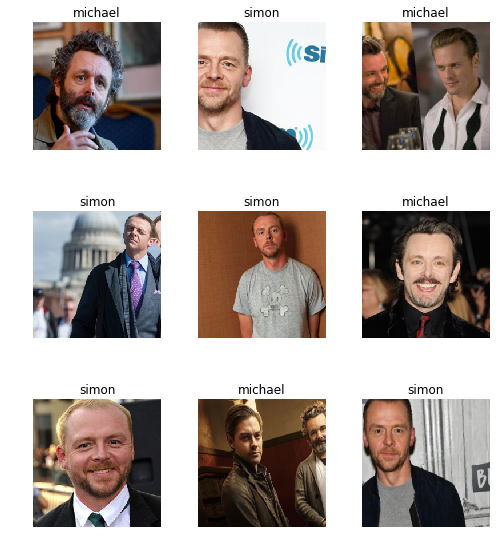

In [16]:
data.show_batch(rows=3, figsize=(7,8))

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['michael', 'simon'], 2, 299, 74)

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.915916,0.647234,0.369863,00:06
1,0.708155,0.401469,0.164384,00:03
2,0.573444,0.327766,0.150685,00:03
3,0.506423,0.324623,0.164384,00:03


In [19]:
learn.save('stage-1')

In [20]:
learn.unfreeze()

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


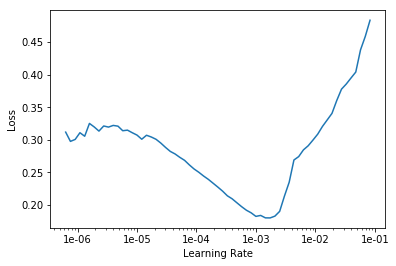

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(6, max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.083189,0.458295,0.109589,00:03
1,0.084645,0.448668,0.109589,00:03
2,0.073947,0.292496,0.068493,00:03
3,0.060671,0.262890,0.082192,00:03
4,0.058811,0.275836,0.095890,00:03
5,0.048724,0.279359,0.109589,00:03


In [25]:
learn.save('stage-2')

In [26]:
learn.load('stage-2');

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

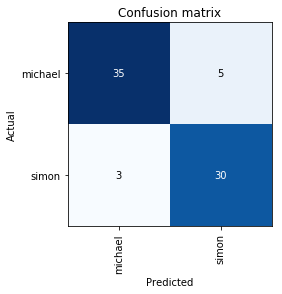

In [28]:
interp.plot_confusion_matrix()

In [29]:
from fastai.widgets import *

In [30]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [31]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [32]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [36]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [37]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [38]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [39]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [40]:
learn.export()

In [41]:
defaults.device = torch.device('cpu')

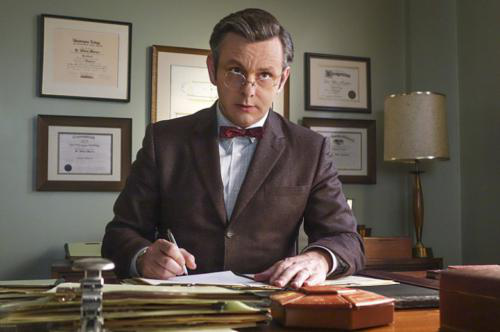

In [51]:
img = open_image(path/'michael'/'00000087.jpg')
img

In [52]:
learn = load_learner(path)

In [53]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category michael

In [8]:
learner.export

NameError: name 'learner' is not defined